# Credit card Fraud Detection

The rise in digital transactions has made credit card fraud detection a critical focus for financial institutions, yet it’s a challenging task due to the significant imbalance in transaction data. Fraudulent transactions are a small fraction compared to legitimate ones, making it difficult for machine learning models to accurately identify anomalies without bias. A common pitfall in traditional fraud detection methods is overfitting on the majority class of legitimate transactions, which leads to poor generalization on real-world data and a tendency to overlook rare fraudulent cases. To make matters more complex, identifying fraud accurately is crucial—not only to prevent unauthorized charges but also to avoid wrongly flagging legitimate transactions, which can lead to customer frustration.

The dataset used contains 284,807 transactions, of which only 492 are fraudulent, making fraud cases a mere 0.172% of the total. Due to this class imbalance, typical accuracy metrics can be misleading; instead, it’s essential to focus on metrics like F1-score, precision, recall, and confusion matrix to gauge the model’s performance more effectively. To address the imbalance, this project employs the Synthetic Minority Oversampling Technique (SMOTE), which generates synthetic examples for the minority class, thereby reducing bias toward legitimate transactions. By experimenting with various machine learning models, this analysis seeks to identify the most effective approach for reliable fraud detection in a real-world setting.

#  Importing required libraries

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef,confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- **Anonymized Features:** Due to confidentiality constraints, the original transaction features have been anonymized through Principal Component Analysis (PCA), resulting in transformed variables labeled V1, V2, ..., V28. While the precise meaning of these features is unknown, they likely represent key transaction details such as card number, expiration date, CVV, cardholder name, location of the transaction, and the date and time of the transaction.

- **Untransformed Features:** Two features, 'Time' and 'Amount,' remain unaltered. The 'Time' feature represents the number of seconds that have passed since the dataset's first recorded transaction, allowing us to analyze the transaction sequence. The 'Amount' feature reflects the transaction value and can be applied in cost-sensitive learning based on transaction size.

- **Target Variable:** The feature 'Class' serves as the target variable, where a value of 1 denotes a fraudulent transaction, and a value of 0 indicates a legitimate transaction.

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Highlights
- The dataset contains 294807 rows of data in each column with 31 features
- There is no missing data in any of the columns
- 28 columns have their names in sequence from V1 to V28
- 3 columns - Time, Amount and Class can be used to generate insights

In [6]:
print(df['Class'].value_counts())
print('\n')
print(df['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64


0    0.998273
1    0.001727
Name: Class, dtype: float64


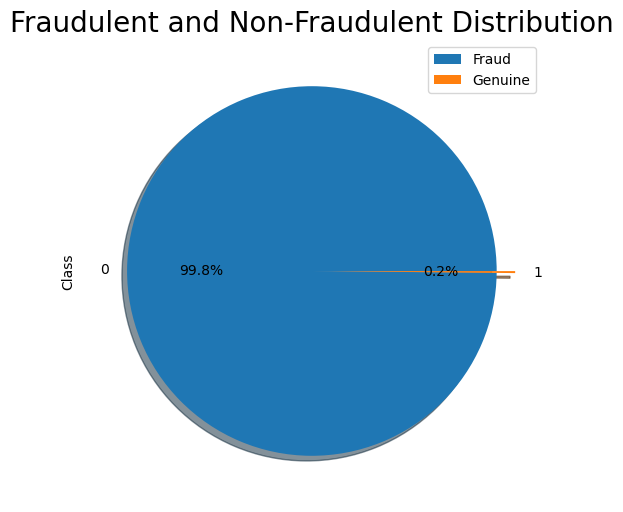

In [7]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

### Highlights

As we can see, the data is highly imbalanced. It contains 284315 non fraud transactions compared to 492 fraudulent transactions which take up 0.17% of the total data. Using this dataset as it is for the predictive models and analysis would lead to overfitting as it would assume that most transactions are non fraudulent.

## Distribution of transaction amount over time

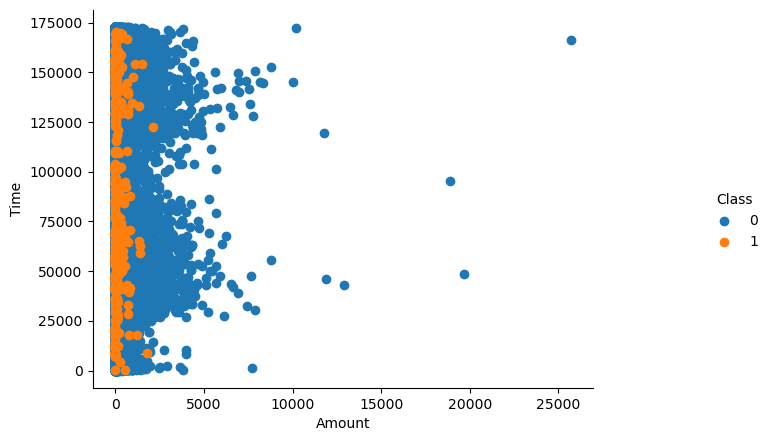

In [8]:
sns.FacetGrid(df, hue="Class").map(plt.scatter, "Amount", "Time").add_legend()
plt.gcf().set_size_inches((10, 5))
plt.show()

### Highlights

Most of the transaction amounts fall between 0 and 3000 with a few very high amounts going up to 25000+ as outliers. We can also see that the fraudulent transaction amounts are also very low with very few amounts going over 1000.

## Distribution of number of transactions over time

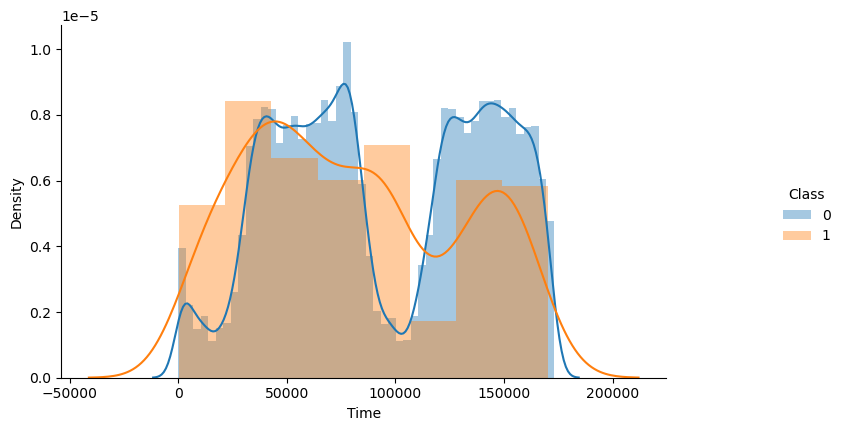

In [9]:
sns.FacetGrid(df, hue="Class").map(sns.distplot,"Time").add_legend()
plt.gcf().set_size_inches((10, 5))
plt.show()

### Highlights
The data is based on transactions taking place over the course of 2 days. We can see from the graph that the drop in transactions is likely during the night. We can also see that fraudulent transactions are more compared to genuine transactions at night likely due to the fact that people are asleep and not likely to look for fraudulent transactions in their accounts.

In [10]:
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


In [11]:
print("Genuine Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min())

Genuine Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: Amount, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


### Highlights

- Most of the fraudulent transactions are for amounts as low as a dollar. There are 27 fraudulent transactions for 0 dollars and 99.99 dollars. The highest fraudulent transaction amount was for 2125.87 dollars.
- The transactions with 0 dollars can be due to zero authorization where the person tries to verify the account using a transaction of 0 dollars and once it goes through, they can try to make bigger transactions.

# Splitting the data into training and testing data

In [12]:
# Create Train and Test Data in ratio 70:30
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']              # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Setting a baseline to see the effectiveness of SMOTE

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [14]:
y_pred_no_smote = logreg.predict(X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.78      0.77       148

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.8883142052304956
F1-Score
0.7744107744107744
Accuracy
0.9992158515033414
Recall
0.777027027027027


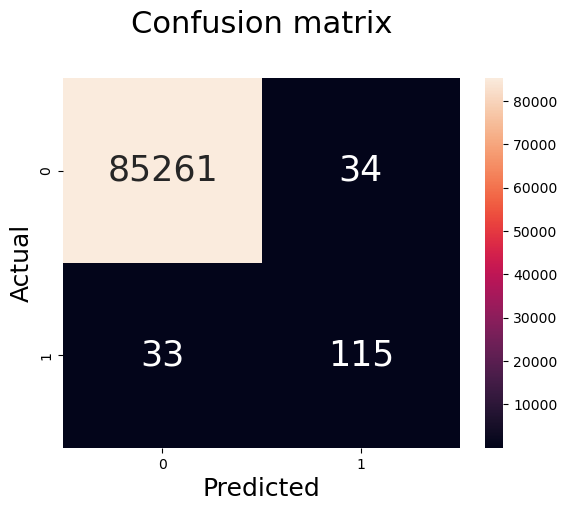

In [16]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_no_smote))
    
print('AUC-ROC')
print(roc_auc_score(y_test, y_pred_no_smote))
      
print('F1-Score')
print(f1_score(y_test, y_pred_no_smote))
    
print('Accuracy')
print(accuracy_score(y_test, y_pred_no_smote))

print('Recall')
print(recall_score(y_test, y_pred_no_smote))

sns.heatmap(pd.DataFrame(confusion_matrix(y_test , y_pred_no_smote)), annot=True, annot_kws={"size": 25} ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

### Highlights

To evaluate how well the model is performing, we must use some classification metrics such as,

- Precision : Rightly predicted results compared to all results - This would midleading for imbalanced data as most of the data is skewed towards genuine transactions.
- Recall : % of results correctly classified. This would among the ideal metrics to use in this scenario.
- Precision : % of results correctly classified as frauds among all results classified as frauds.
- F1 Score : Maintains a balance between precision and recall.

For the original imbalanced dataset, the recall is 77%.

# Applying SMOTE to balance the dataset

SMOTE or Synthetic Minority Oversampling Technique is a very effective way to balance datasets. Compared to usual oversampling techniques where the minority data is just duplicated to balance the dataset, SMOTE synthecially creates new datapoints that are close to selected minority datapoints to populate the minority data.

In [17]:
print('Original dataset shape %s' % Counter(y_train))
# Use Synthetic Minority Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 199020, 1: 344})
Resampled dataset shape Counter({0: 199020, 1: 199020})


In [18]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res) 

LogisticRegression()

In [19]:
y_pred_smote = logreg.predict(X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.91      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

AUC-ROC
0.9430772850346095
F1-Score
0.13929313929313933
Accuracy
0.980618658052737
Recall
0.9054054054054054


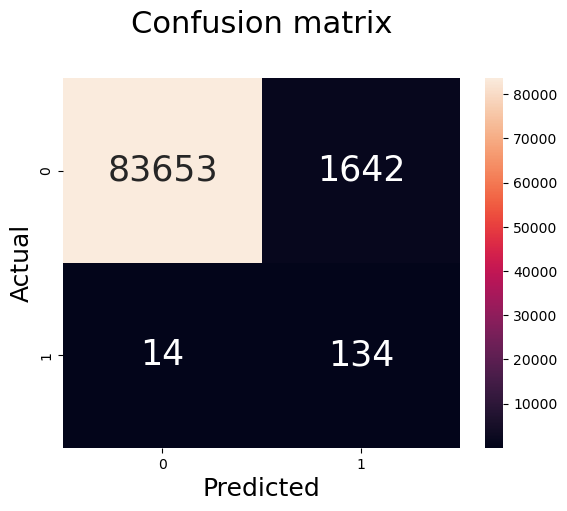

In [20]:
print('CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_smote))
    
print('AUC-ROC')
print(roc_auc_score(y_test, y_pred_smote))
      
print('F1-Score')
print(f1_score(y_test, y_pred_smote))
    
print('Accuracy')
print(accuracy_score(y_test, y_pred_smote))

print('Recall')
print(recall_score(y_test, y_pred_smote))

sns.heatmap(pd.DataFrame(confusion_matrix(y_test , y_pred_smote)), annot=True, annot_kws={"size": 25} ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

### Highlights

- As we can see, after balancing the dataset using SMOTE, the recall grows by a large amount to 90%. This shows how impressive SMOTE is in balancing datasets.

# Building Different models with the balanced dataset

In [21]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)
    
def evaluation(y_test, grid_clf, X_test):
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

    print('Recall')
    print(recall_score(y_test, y_pred))
    
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test , y_pred)), annot=True, annot_kws={"size": 25} ,fmt='g')
    plt.title('Confusion matrix', y=1.1, fontsize = 22)
    plt.xlabel('Predicted',fontsize = 18)
    plt.ylabel('Actual',fontsize = 18)
    plt.show()

In [22]:
# The parameters of each classifier are different
# Hence, we do not make use of a single method and this is not to violate DRY Principles
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [23]:
grid_eval(grid_sgd)

Best Score 0.9560162686072134
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.91      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.62     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.9479720619851928
F1-Score
0.2460973370064279
Accuracy
0.990391254988706
Recall
0.9054054054054054


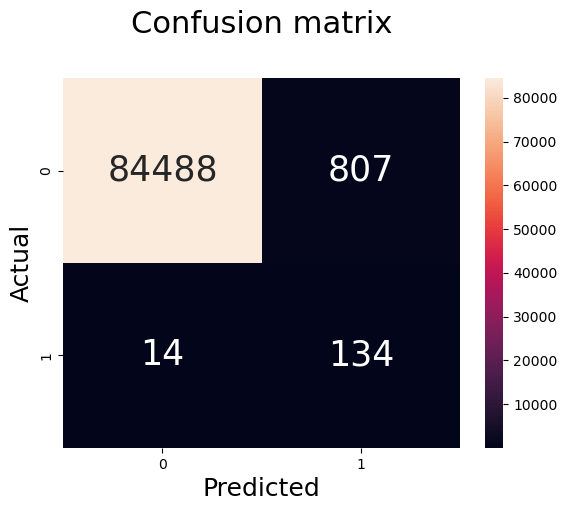

In [24]:
evaluation(y_test, grid_sgd, X_test)

In [25]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [26]:
grid_eval(grid_rf)

Best Score 0.9997538267139271
Best Parameter {'model__n_estimators': 75}


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.86      0.88       148

    accuracy                           1.00     85443
   macro avg       0.95      0.93      0.94     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.9323445023075716
F1-Score
0.879725085910653
Accuracy
0.9995903701883126
Recall
0.8648648648648649


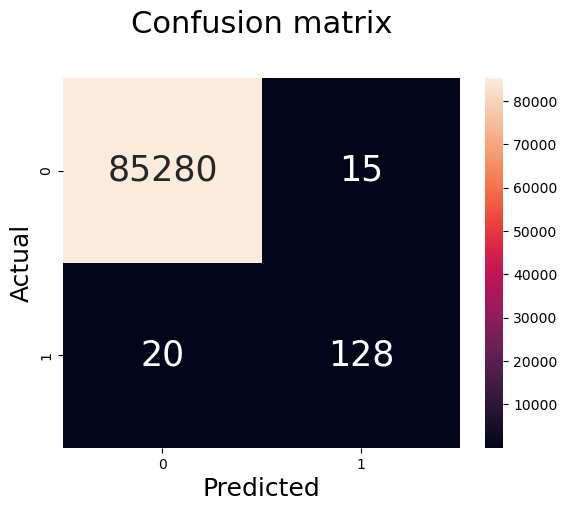

In [27]:
evaluation(y_test, grid_rf, X_test)

In [28]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [29]:
grid_eval(grid_lr)

Best Score 0.959816277887179
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.91      0.26       148

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.63     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.948212404326479
F1-Score
0.2557251908396946
Accuracy
0.9908711070538253
Recall
0.9054054054054054


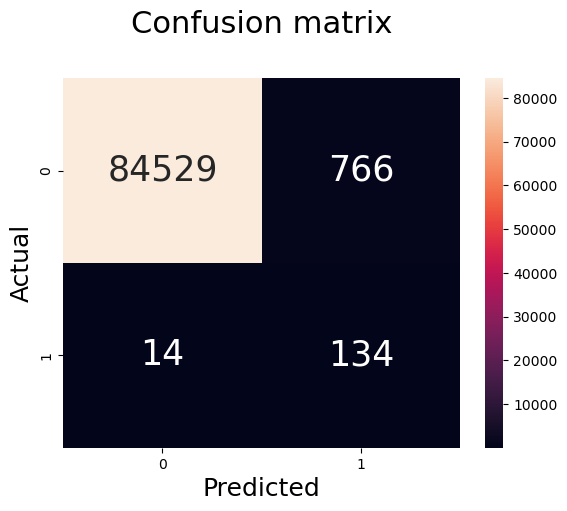

In [30]:
evaluation(y_test, grid_lr, X_test)

In [31]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [32]:
grid_eval(grid_knn)

Best Score 0.9980623930056313
Best Parameter {'model__p': 2}


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.50      0.86      0.63       148

    accuracy                           1.00     85443
   macro avg       0.75      0.93      0.82     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.9283095789968995
F1-Score
0.6318407960199005
Accuracy
0.9982678510820079
Recall
0.8581081081081081


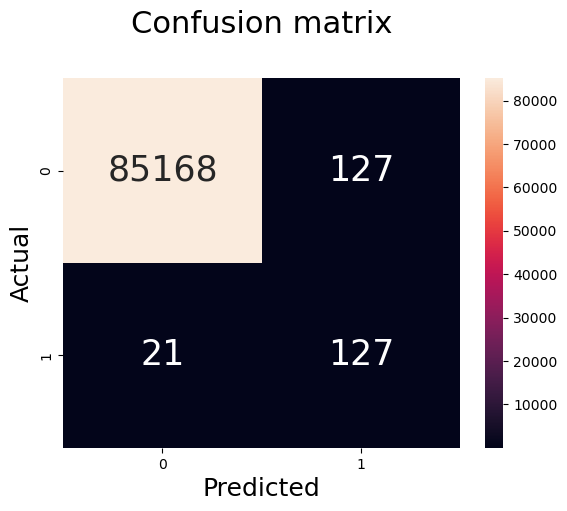

In [33]:
evaluation(y_test, grid_knn, X_test)

# Conclusion

Comparing all the different models, the performance of random forest model is the best at accurately identifying fraudulent transactions with an F1 score of 87.97%.
